# Bike Rides Duration by Distance and Users
## by Ahmed Sayed

## Investigation Overview

In this presentation, I want to look at the main features of the rides that could predict the duration given the distance. The aim of this is to show you the effects on the duration by distance, days, and which type of users. 

## Dataset Overview

The data consisted of duration in seconds and other time/location features of approximately 210,600 rides. The variables included the starting and ending time, as well as the starting and ending locations of each ride.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201908-baywheels-tripdata.csv')

In [3]:
# convert datetime columns
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [4]:
# convert duration time from seconds to minutes
df['duration_sec'] = df['duration_sec']/60
df.rename(columns={'duration_sec':'duration_min'}, inplace=True)

In [5]:
# extract hours and days columns
df['hours'] = df.start_time.dt.hour
df['days'] = df.start_time.dt.dayofweek.map({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})
ordered_days = {'days': ['Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday']}
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordered_days['days'])
df['days'] = df['days'].astype(ordered_var)

In [6]:
# calculate euclidean distance from the starting and ending positions
deglen = 110.25
x = df['start_station_latitude'] - df['end_station_latitude']
y = (df['start_station_longitude'] - df['end_station_longitude']) * np.cos(deglen)
df['distance_km'] = np.sqrt(x*x + y*y)*deglen

## Distribution of Ride Duration

The duration time has a long-tailed **(right-skewed)** distribution with almost **90%** of the rides are below 23 minutes, while **97%** are below 38 minutes. Also, within 30 and 50-minutes period, the distribution is heavily skewed to the right, leeding the idea that the bikes are generally used for short trips.

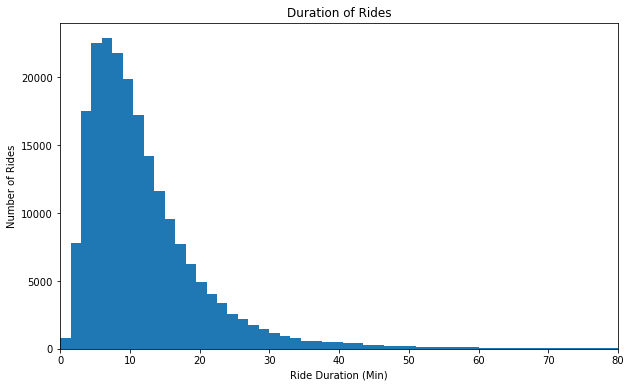

In [7]:
binsize = 1.5
bins = np.arange(0, df['duration_min'].max()+binsize, binsize)
plt.figure(figsize=(10,6))
plt.hist(data=df, x='duration_min', bins=bins);
plt.xlim(0, 80)
plt.title('Duration of Rides')
plt.ylabel('Number of Rides')
plt.xlabel('Ride Duration (Min)');

## Distribution of Bike Usage by Hour

The rides per hour distribution is roughly a bimodal with peaks at 8 AM and 5 PM, which means that the bike share system is busiest during commute hours. And it's not a surprise that the quitest times are in the night early hours.

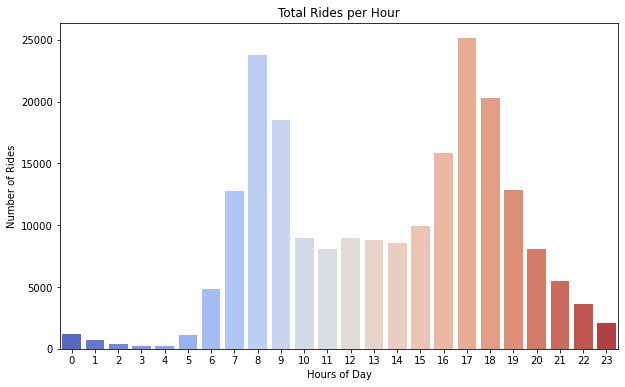

In [8]:
plt.figure(figsize=(10,6))
sb.countplot(data=df, x='hours',palette='coolwarm');
plt.title('Total Rides per Hour');
plt.xlabel('Hours of Day');
plt.ylabel('Number of Rides');

## Bike Usage by Customers and Subscribers

It's obvious that the majority of the rides are made by the subscribers while only **21.7%** of the rides come from customers. 

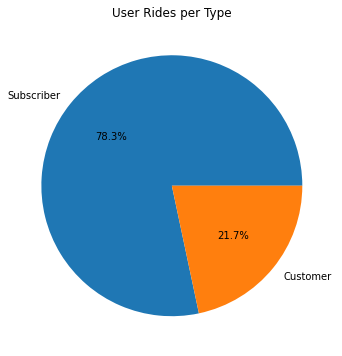

In [9]:
plt.figure(figsize=(8,6))
vals = df['user_type'].value_counts().values
plt.pie(vals, labels=df['user_type'].value_counts().index,autopct='%1.1f%%');
plt.title('User Rides per Type');

## Distance Travelled by Users

It's very clear that the distance for each day is the same with slight difference in the duration for all the rides.

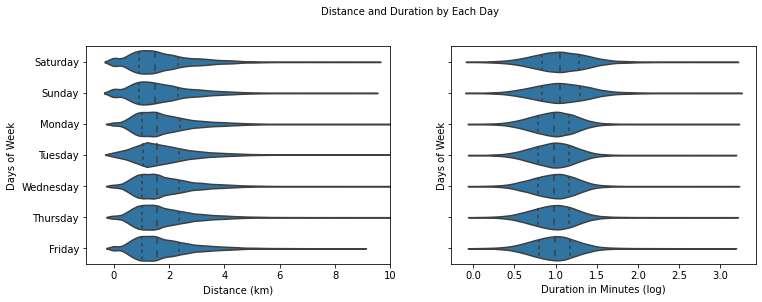

In [10]:
# compute additional column from logarithmic duration to see the graphs clearly
df['duration_log'] = np.log10(df['duration_min'])
base_color = sb.color_palette()[0]
fig, ax = plt.subplots(ncols=2, figsize = [12,4], sharey=True)
sb.violinplot(data=df, x='distance_km', y='days', inner = 'quartile', color=base_color,ax=ax[0]);
sb.violinplot(data=df, x='duration_log', y='days', inner = 'quartile', color=base_color, ax=ax[1]);
fig.text(0.5,1,'Distance and Duration by Each Day',ha='center', va='center');
ax[1].set_xlabel('Duration in Minutes (log)');
ax[1].set_ylabel('Days of Week');
ax[0].set_xlabel('Distance (km)');
ax[0].set_ylabel('Days of Week');
ax[0].set_xlim(-1,10);

## Duration by Users and Each Day

The subscribers seem to spend less time in terms of duration with approximately (2.5 minutes). While the customers' rides spike more on Saturday and Sunday.

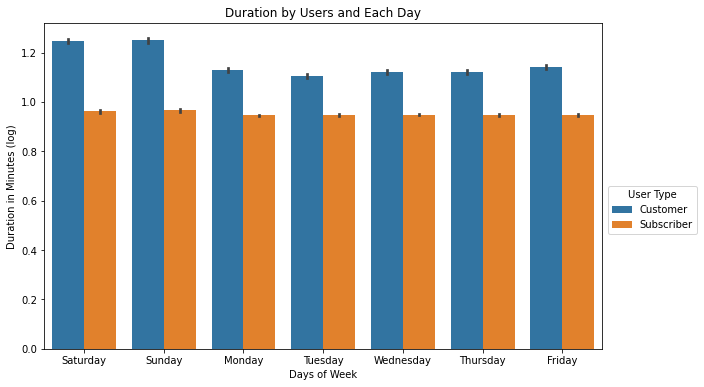

In [11]:
# plot the user_type in terms of days and log duration
fig = plt.figure(figsize = [10,6])
g = sb.barplot(data = df, x = 'days', y = 'duration_log', hue = 'user_type');
plt.legend(bbox_to_anchor=(1.01, 0.5),borderaxespad=0, title='User Type');
plt.title('Duration by Users and Each Day');
plt.ylabel('Duration in Minutes (log)');
plt.xlabel('Days of Week');

## Duration by Distance and Each Day

A strong positive relationship has been observed between the distance and the logarithmic duration over all days of the week. 

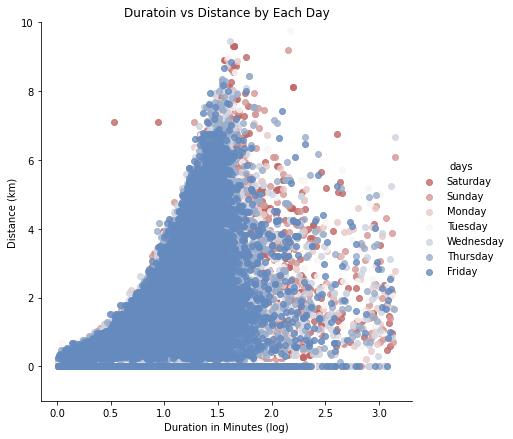

In [12]:
# plot the distance vs duration interms of days
g = sb.FacetGrid(data = df, hue = 'days', height = 6, palette='vlag_r');
g.map(sb.regplot, 'duration_log', 'distance_km',fit_reg=False);
g.add_legend();
plt.xlabel('Duration in Minutes (log)');
plt.ylabel('Distance (km)');
plt.title('Duratoin vs Distance by Each Day')
plt.ylim(-1,10);